In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'eq Image')

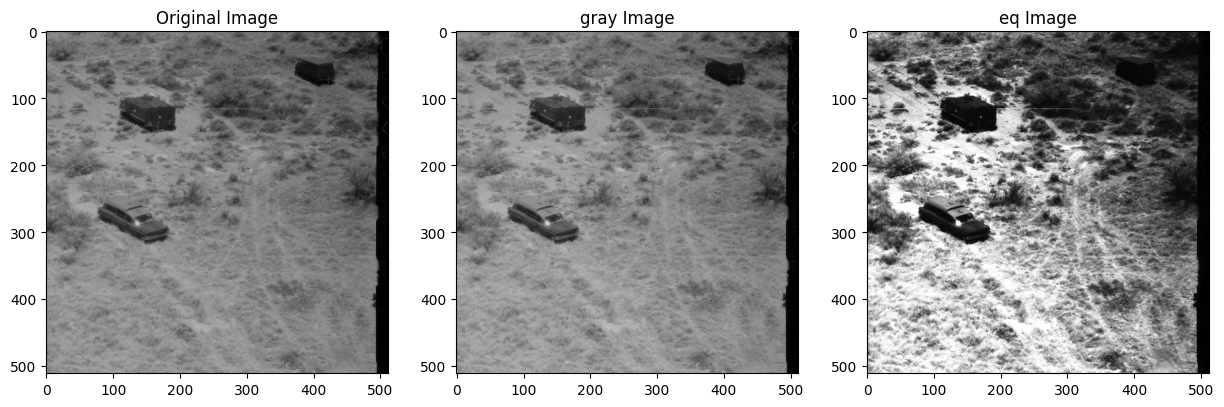

In [16]:
# load image
img = cv2.imread("imgs/Brazil.png") 

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# equalize histogram
eq = cv2.equalizeHist(gray)

# this is a image of 1000x1000 pixels that goes from lat -60 to 10 and long -80 to -30
img_lat_min = -60
img_lat_max = 10

img_long_min = -80
img_long_max = -30

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(gray, cmap='gray')
axs[1].set_title('gray Image')

axs[2].imshow(eq, cmap='gray')
axs[2].set_title('eq Image')

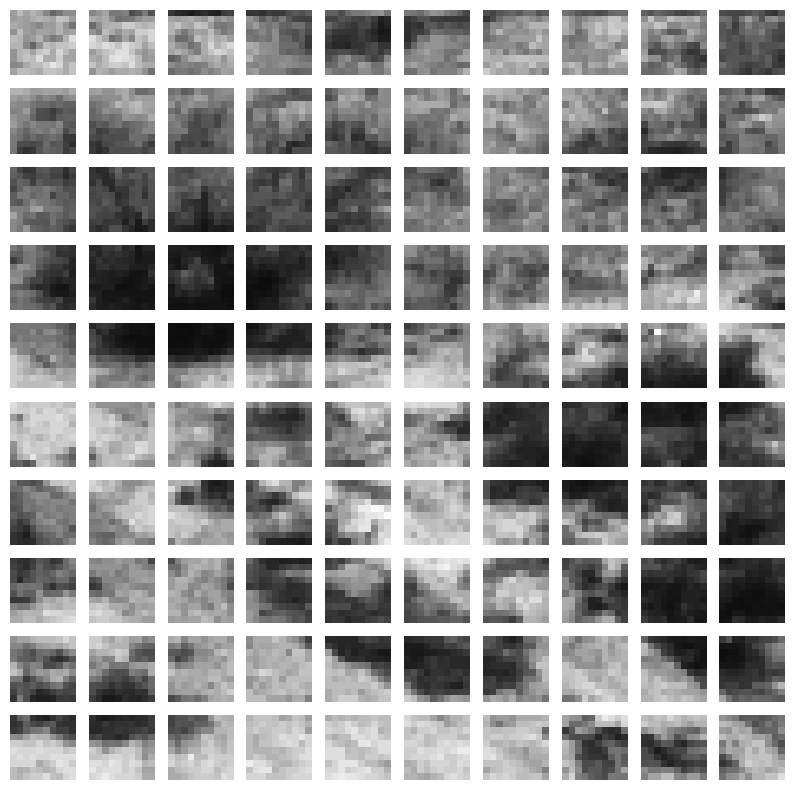

In [17]:
# split into 10x10 tiles
tiles = []
for i in range(0, img.shape[0], 10):
    row = []
    for j in range(0, img.shape[1], 10):
        row.append(eq[i:i+10, j:j+10])
    tiles.append(row)

fig, axs = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(tiles[i][j], cmap='gray', vmin=0, vmax=255)
        axs[i, j].axis('off')

plt.show()

In [9]:
def convert_to_quadran(lat,log):
    # convert lat and long to pixel
    lat = (lat - img_lat_min) / (img_lat_max - img_lat_min) * img.shape[0]
    log = (log - img_long_min) / (img_long_max - img_long_min) * img.shape[1]

    # convert pixel to tile
    tile_lat = int(lat / 10)
    tile_log = int(log / 10)

    # convert pixel to quadran
    quadran_lat = int((lat - tile_lat * 10) / 5)
    quadran_log = int((log - tile_log * 10) / 5)

    return tile_lat, tile_log, quadran_lat, quadran_log

def get_tile(lat, log):
    tile_lat, tile_log, quadran_lat, quadran_log = convert_to_quadran(lat, log)
    return tiles[tile_lat][tile_log]

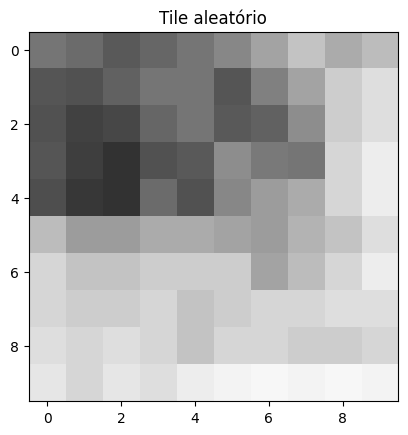

In [19]:
# get random tile
import random
lat = random.uniform(-60, 10)
log = random.uniform(-80, -30)

tile = get_tile(lat, log)

plt.imshow(tile, cmap='gray', vmin=0, vmax=255)
plt.title("Tile aleatório")
plt.show()

In [21]:
# flatten tile
tile_flat = tile.flatten()
print(tile_flat.shape)
print(tile_flat)

(100,)
[117 107  89 102 117 135 163 196 171 188  85  82  98 117 117  85 128 163
 205 222  82  65  71 102 117  89  98 141 205 222  85  62  50  82  89 141
 122 117 214 237  78  55  50 107  82 135 156 171 214 237 188 156 156 171
 171 163 156 180 196 222 214 196 196 205 205 205 163 188 214 237 214 205
 205 214 196 205 214 214 222 222 222 214 222 214 196 214 214 205 205 214
 230 214 230 222 237 243 247 243 247 243]
